In [29]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') # special style template for matplotlib, highly useful for visualizing time series data
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

In [30]:
df = pd.read_csv('data/Electric_Production.csv')


In [31]:
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [32]:
df.tail()

,DATE,Value
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212
396,01-01-2018,129.4048


In [33]:
#Rename Columns
# df.columns=['Date', 'Consumption']
df.rename(columns={'DATE': 'Date', 'Value': 'Consumption'}, inplace=True)

# Drop Null Values
# df=df.dropna()

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) #set date as index
df.head()

,Consumption
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [34]:
df1=df.copy()

In [35]:
pd.infer_freq(df.index)

'MS'

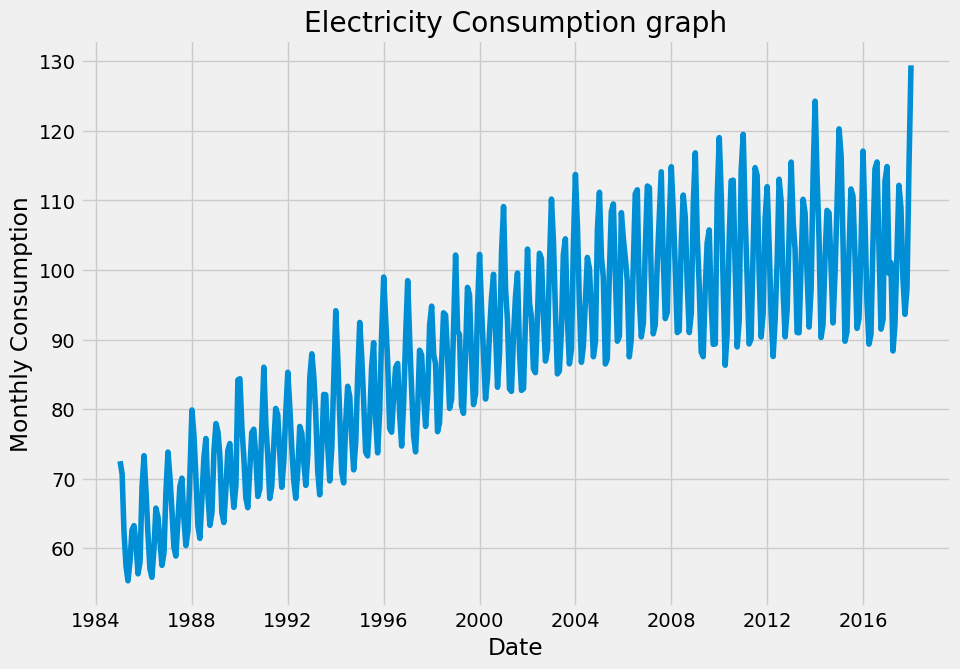

In [36]:
plt.xlabel("Date")
plt.ylabel("Monthly Consumption")
plt.title("Electricity Consumption graph")
plt.plot(df)

In [37]:
# Extract Monthly Data

df['year'] = df.index.year
# df_sub = df[(df['year'] >= 2016) & (df['year'] <= 2018)]['Consumption']
df_2016 = df[df['year'] ==2016]['Consumption']
df_2017 = df[df['year'] ==2017]['Consumption']



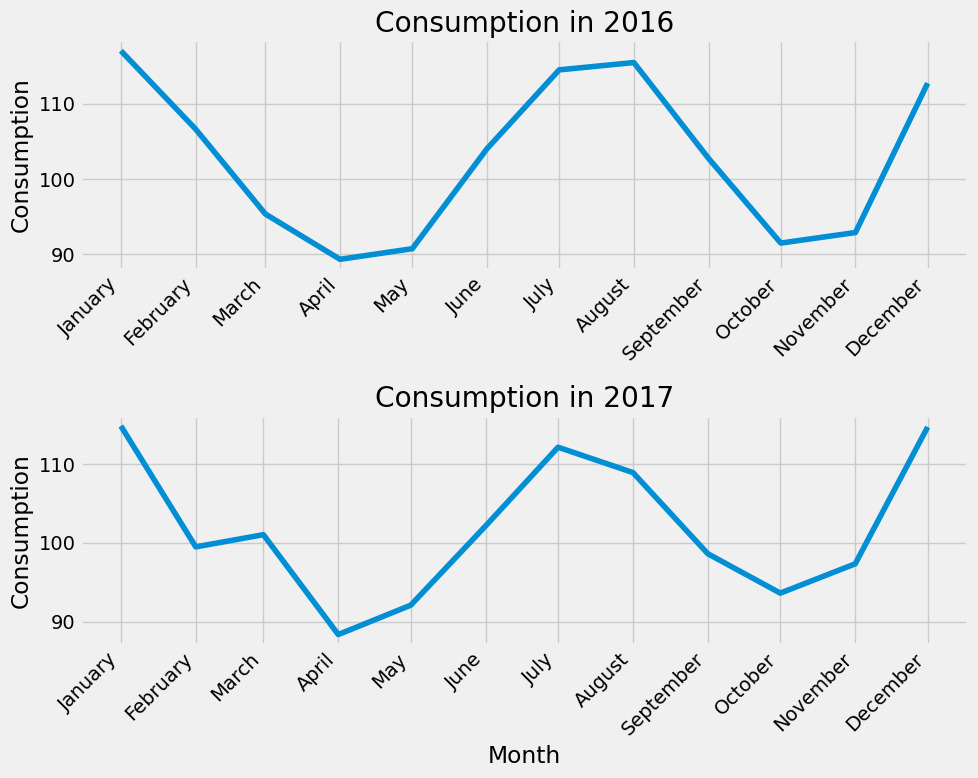

In [38]:
import matplotlib.dates as mdates

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))


# Plot 2016 data
ax1.plot(df_2016.index, df_2016)
ax1.set_title('Consumption in 2016')
ax1.set_ylabel('Consumption')
# ax1.legend()

# Plot 2017 data
ax2.plot(df_2017.index, df_2017)
ax2.set_title('Consumption in 2017')
ax2.set_ylabel('Consumption')
# ax2.legend()

# Set major ticks to the first day of each month and format to show month names
for ax in [ax1, ax2]:
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Display month names

# Rotate month labels for both plots for better readability
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Display the plot
plt.xlabel('Month')
plt.tight_layout()
plt.show()

In [39]:
# Extract more time features
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['year'] = df.index.year
df['dayofyear'] = df.index.dayofyear

In [40]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    return 'Unknown'

# Apply the function to the 'Month' column to create the 'Season' column
df['Season'] = df['month'].apply(get_season)

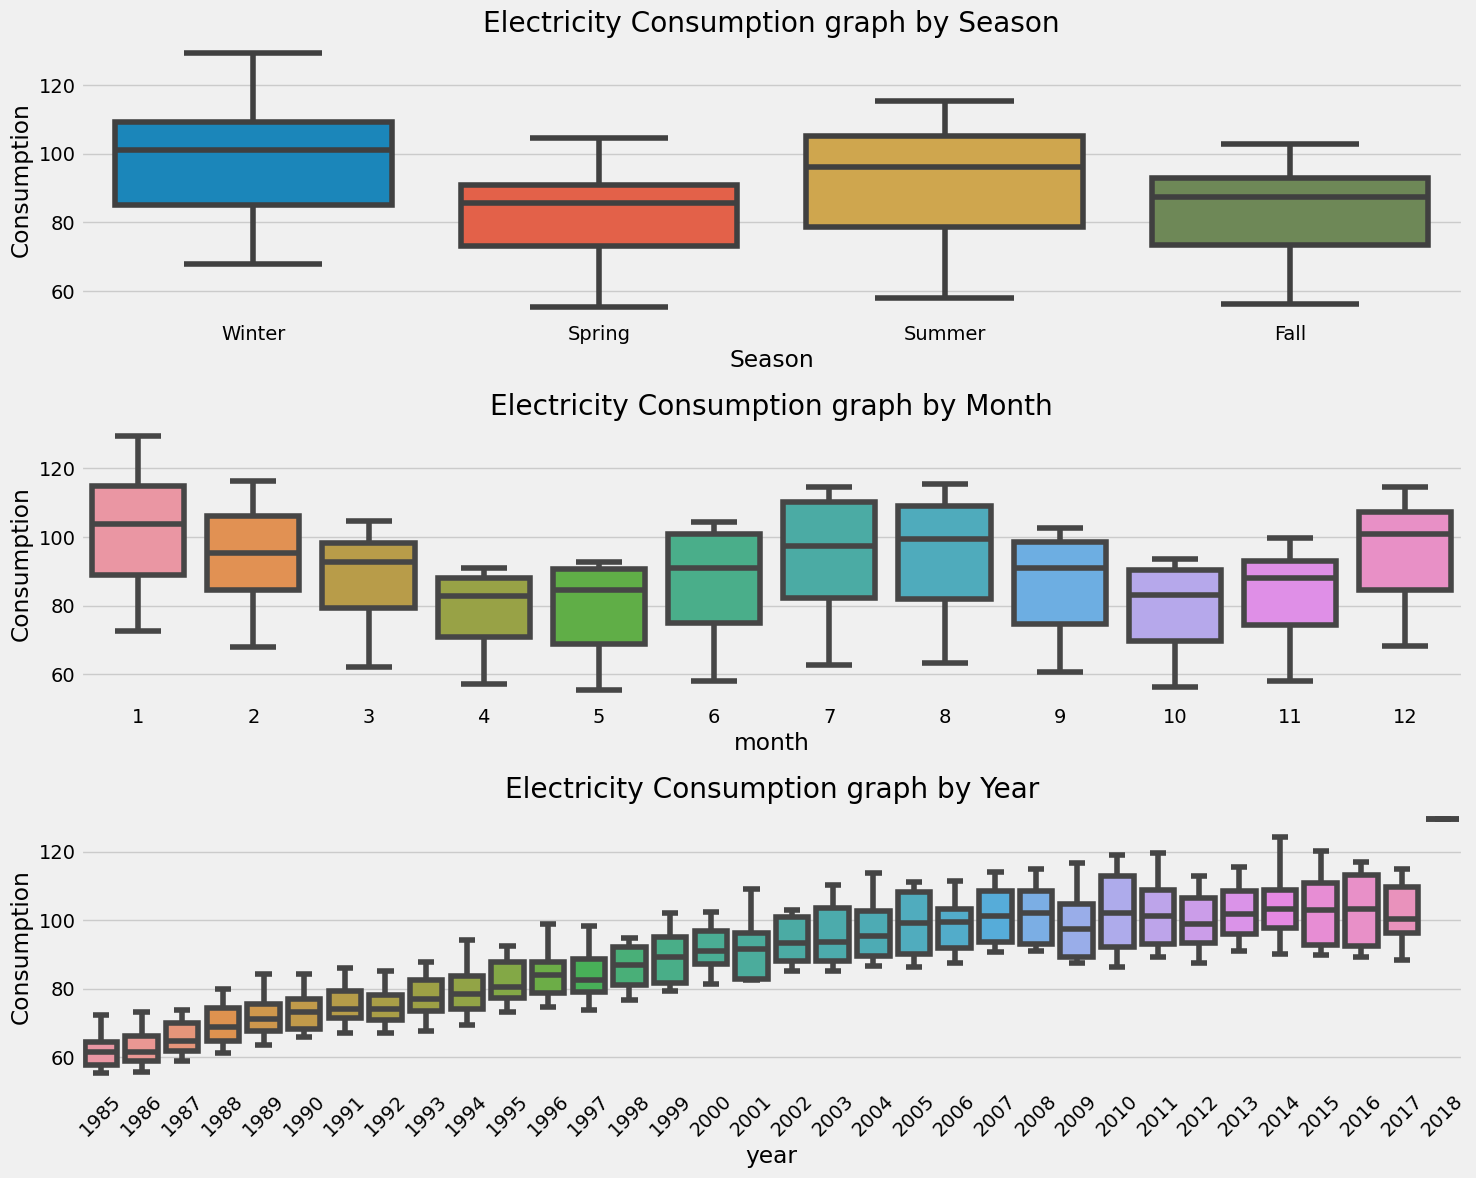

In [41]:
# Set up a 1x2 grid for the subplots

# Set up a 2x1 grid for the subplots
f, ax = plt.subplots(3, 1, figsize=(15, 12))


# Boxplot for electricity consumption by Season
p1 = sns.boxplot(data=df, x='Season', y='Consumption', ax=ax[0])
p1.set_title("Electricity Consumption graph by Season")

# Boxplot for electricity consumption by Month
p2 = sns.boxplot(data=df, x='month', y='Consumption', ax=ax[1])
p2.set_title("Electricity Consumption graph by Month")

# Boxplot for electricity consumption by Year
p3 = sns.boxplot(data=df, x='year', y='Consumption', ax=ax[2])
p3.set_title("Electricity Consumption graph by Year")
# Rotate x-tick labels for the Year plot
plt.xticks(ax[2].get_xticks(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

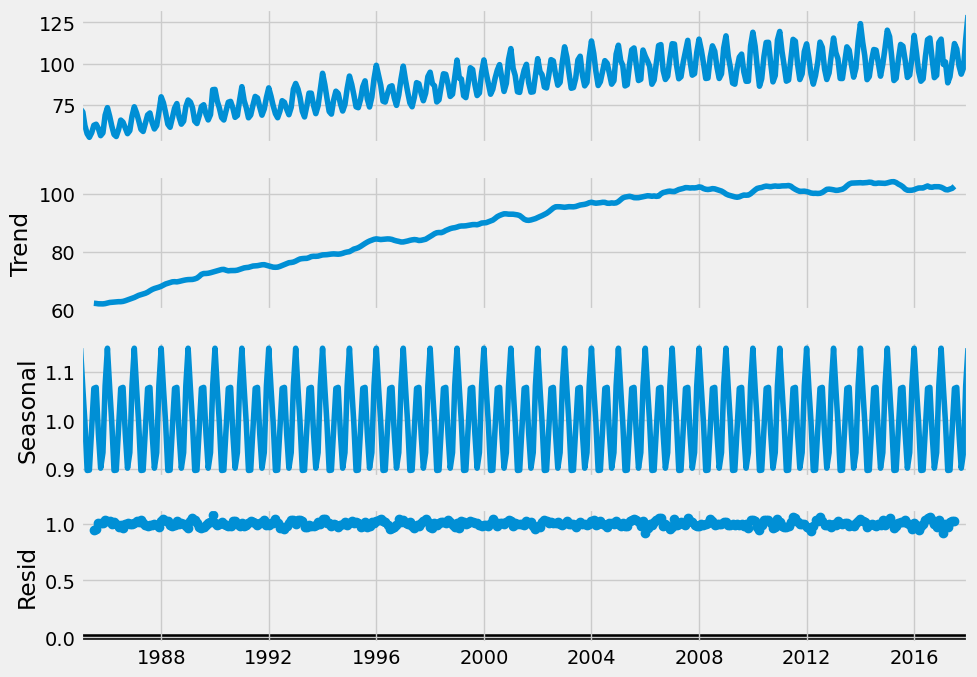

In [42]:
# time series components 

##  separate Trend and Seasonality from the time series
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1, model='multiplicative')
result.plot()
plt.show()

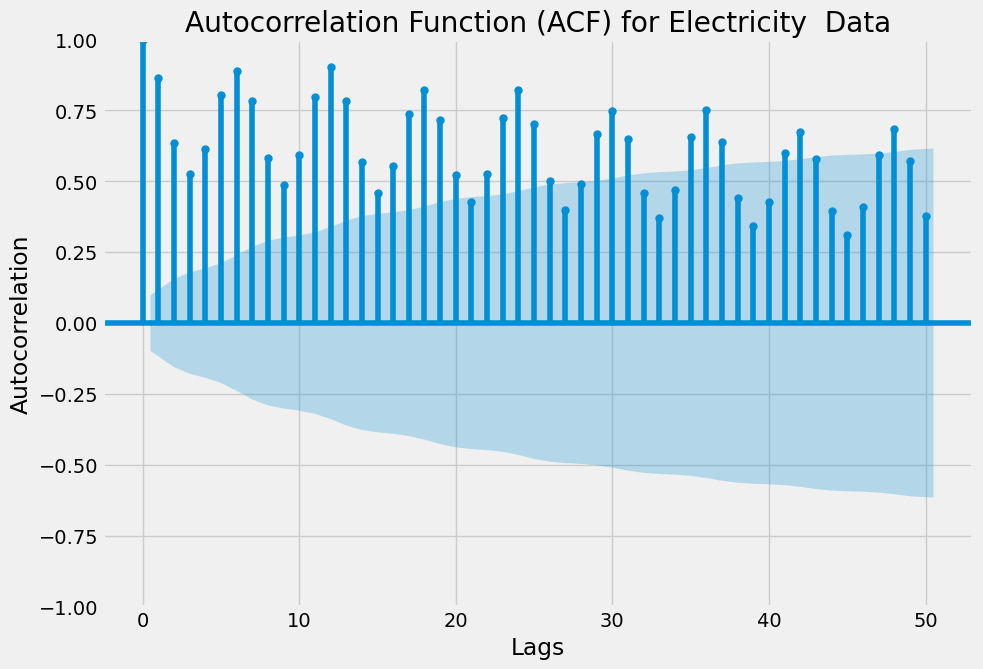

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1['Consumption'],lags=50)
plt.title('Autocorrelation Function (ACF) for Electricity  Data')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

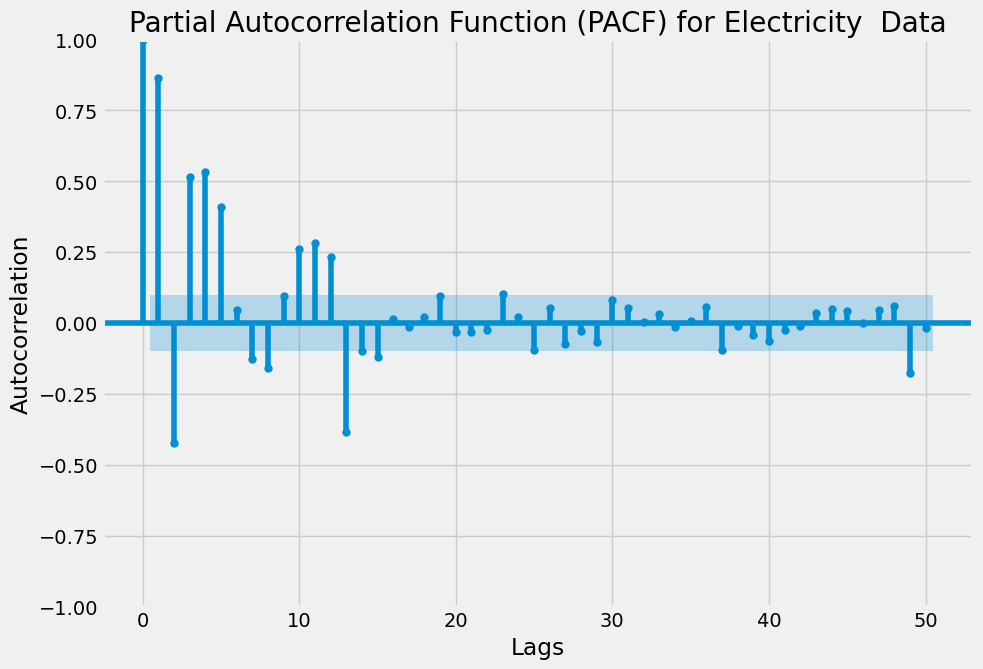

In [46]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df1['Consumption'],lags=50)
plt.title('Partial Autocorrelation Function (PACF) for Electricity  Data')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()